In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7

import numpy as np
np.random.seed(0)
%matplotlib inline


from sklearn.neural_network import MLPClassifier



from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [100]:
#label columns
features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']

#import testing data
training_data = pd.read_csv('../test_train_data/poker-hand-training-true.data', names=features)

In [101]:
training_data.head(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
5,1,2,1,4,1,5,1,3,1,6,8
6,1,9,1,12,1,10,1,11,1,13,8
7,2,1,2,2,2,3,2,4,2,5,8
8,3,5,3,6,3,9,3,7,3,8,8
9,4,1,4,4,4,2,4,3,4,5,8


In [88]:
#Information about the training data:
print(f"Number of Rows: {len(training_data.index)}")
print(f"Number of Columns: {len(training_data.columns)}")
print(f"Number of Data Points: {training_data.size}")
print(f"Dimensions: {training_data.shape}")

Number of Rows: 25010
Number of Columns: 11
Number of Data Points: 275110
Dimensions: (25010, 11)


In [89]:
#Class Information
num_classes = 10
classes = {}

#get how many rows result in each class
for i in range(num_classes):
    classes[i] = len(training_data[training_data.CLASS == i])
print(classes)

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


In [90]:
hand_ids = list(range(10))
hand_name = {
    0: 'Nothing in Hand',
    1: 'One Pair',
    2: 'Two Pairs',
    3: 'Three of A Kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full House',
    7: 'Four of a Kind',
    8: 'Straight Flush',
    9: 'Royal Flush'
}

In [91]:
for i in poker_hands:
    print(f"({hand_ids[i]}) {hand_name[i]}: {classes[i]}")

(0) Nothing in Hand: 12493
(1) One Pair: 10599
(2) Two Pairs: 1206
(3) Three of A Kind: 513
(4) Straight: 93
(5) Flush: 54
(6) Full House: 36
(7) Four of a Kind: 6
(8) Straight Flush: 5
(9) Royal Flush: 5


Text(0.5,1,'Instances of Poker Hands in Training Data')

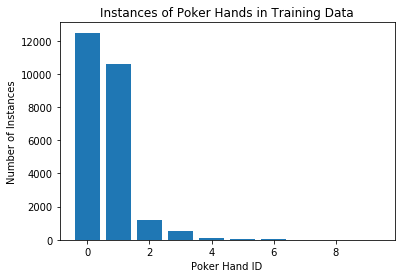

In [92]:
plt.bar(poker_hands, [classes[i] for i in hand_ids], align = 'center')
plt.xlabel('Poker Hand ID')
plt.ylabel('Number of Instances')
plt.title("Instances of Poker Hands in Training Data")

In [99]:
X_train = training_data.iloc[:, 0: 10].as_matrix() #first 10 columns
y_train = training_data.iloc[:, 10].as_matrix() #last column (classification/poker hand type)

In [123]:
#import testing data
testing_data = pd.read_csv('../test_train_data/poker-hand-testing.data', names=features)
X_test = testing_data.iloc[:, 0: 10].as_matrix() #first 10 columns
y_test = testing_data.iloc[:, 10].as_matrix() #last column (classification/poker hand type)  

### MLP 1: 2 layers (5, 2)

In [132]:
#setup neural net using sklearn
clf1 = MLPClassifier(solver='adam', alpha = 1e-5, hidden_layer_sizes=(5, 2), random_state = 1)
clf1.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [135]:
#predict labels of testing data using

predictions = clf1.predict(X_test)
actual = y_test
comparison = predictions == actual #do the values match?

correct = np.count_nonzero(comparison == True) #count of trues in comparison
incorrect = np.count_nonzero(comparison == False) #cound of falses
print(correct, incorrect)

501209 498791


Text(0.5,1,'Instances of Correct/Incorrect in Prediction')

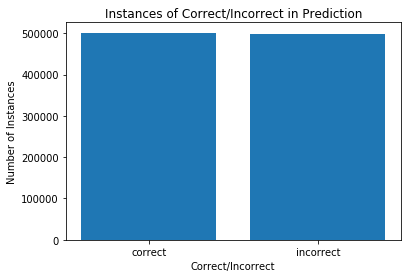

In [136]:
plt.bar(['correct', 'incorrect'], [correct, incorrect], align = 'center')
plt.xlabel('Correct/Incorrect')
plt.ylabel('Number of Instances')
plt.title("Instances of Correct/Incorrect in Prediction")

### MLP 2: 5 layers (100, 50, 20, 10, 5)

In [140]:
#setup neural net with bigger hidden layer sizes using sklearn
clf2 = MLPClassifier(solver='adam', alpha = 1e-5, hidden_layer_sizes=(100, 50, 20, 10, 5), random_state = 1)
clf2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 20, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [141]:
#predict labels of testing data using
predictions = clf2.predict(X_test)
actual = y_test
comparison = predictions == actual #do the values match?

correct = np.count_nonzero(comparison == True) #count of trues in comparison
incorrect = np.count_nonzero(comparison == False) #count of falses
print(correct, incorrect)

835583 164417


Text(0.5,1,'Instances of Correct/Incorrect in Prediction')

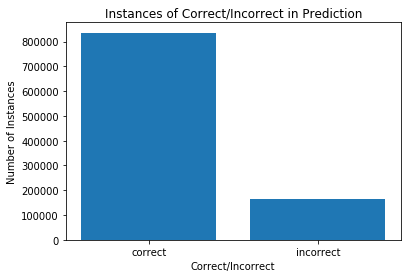

In [144]:
plt.bar(['correct', 'incorrect'], [correct, incorrect], align = 'center')
plt.xlabel('Correct/Incorrect')
plt.ylabel('Number of Instances')
plt.title("Instances of Correct/Incorrect in Prediction")

### MLP 3: 8 layers (1000, 500, 200, 100, 50, 20, 10, 5)

In [177]:
#setup neural net with bigger hidden layer sizes using sklearn
clf3 = MLPClassifier(solver='adam', alpha = 1e-5, hidden_layer_sizes=(1000, 500, 200, 100, 50, 20, 10, 5), random_state = 1)
clf3.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 500, 200, 100, 50, 20, 10, 5),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [178]:
#predict labels of testing data using
predictions = clf3.predict(X_test)
actual = y_test
comparison = predictions == actual #do the values match?

correct = np.count_nonzero(comparison == True) #count of trues in comparison
incorrect = np.count_nonzero(comparison == False) #count of falses
print(correct, incorrect)

979865 20135


Text(0.5,1,'Instances of Correct/Incorrect in Prediction')

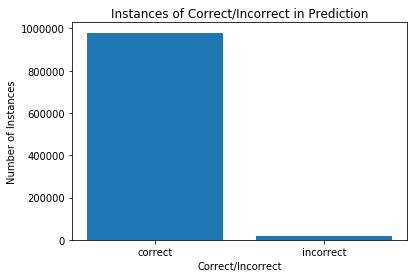

In [181]:
plt.bar(['correct', 'incorrect'], [correct, incorrect], align = 'center')
plt.xlabel('Correct/Incorrect')
plt.ylabel('Number of Instances')
plt.title("Instances of Correct/Incorrect in Prediction")

### Keras Model 1: 2 layers (16, 10), 200 epochs 

dict_keys(['loss', 'accuracy'])


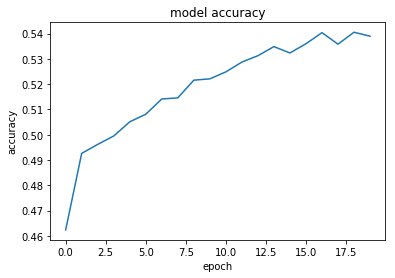

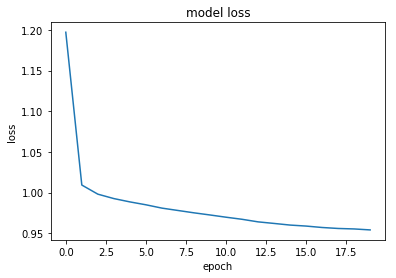

In [219]:
model1 = Sequential()
model1.add(Dense(16, input_dim = 10, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Y_train = to_categorical(y_train)

history = model1.fit(X_train, Y_train, epochs = 200, batch_size=32, verbose=0)

print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [236]:
# Validating the accuracy and loss of our training set
loss, accuracy = model1.evaluate(X_train, Y_train, verbose=0)
print("Train: accuracy=%f loss=%f" % (accuracy, loss))

# Checking the success rate on our test set
Y_test = to_categorical(y_test)

loss, accuracy = model1.evaluate(X_test, Y_test, verbose=0)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

Train: accuracy=0.537065 loss=0.950645
Test: accuracy=0.537590 loss=0.952584


### Keras Model 2: 3 layers (30, 30, 10), 200 epochs

dict_keys(['loss', 'accuracy'])


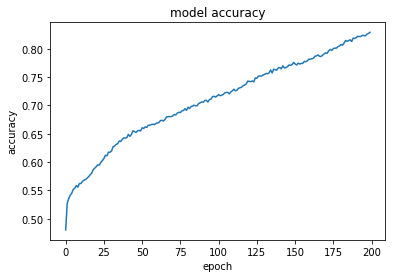

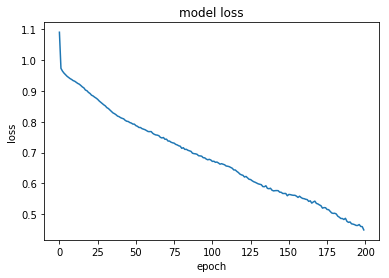

In [225]:
model2 = Sequential()
model2.add(Dense(30, input_dim = 10, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Y_train = to_categorical(y_train)

history = model2.fit(X_train, Y_train, epochs = 200, batch_size=32, verbose=0)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [235]:
# Validating the accuracy and loss of our training set
loss, accuracy = model2.evaluate(X_train, Y_train, verbose=0)
print("Train: accuracy=%f loss=%f" % (accuracy, loss))

# Checking the success rate on our test set
Y_test = to_categorical(y_test)

loss, accuracy = model2.evaluate(X_test, Y_test, verbose=0)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

Train: accuracy=0.835786 loss=0.438190
Test: accuracy=0.827396 loss=0.464400


### Keras Model 3: 4 layers (50, 50, 30, 10), 500 epochs

dict_keys(['loss', 'accuracy'])


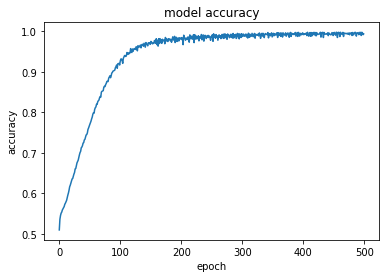

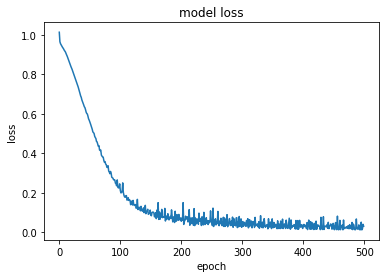

In [230]:
model3 = Sequential()
model3.add(Dense(50, input_dim = 10, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Y_train = to_categorical(y_train)

history = model3.fit(X_train, Y_train, epochs = 500, batch_size=32, verbose=0)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [251]:
# Validating the accuracy and loss of our training set
loss, accuracy = model3.evaluate(X_train, Y_train, verbose=0)
print("Train: accuracy=%f loss=%f" % (accuracy, loss))

# Checking the success rate on our test set
Y_test = to_categorical(y_test)

loss, accuracy = model3.evaluate(X_test, Y_test, verbose=0)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

Train: accuracy=0.996921 loss=0.013497
Test: accuracy=0.993422 loss=0.058205


### Try Model on Random Hands

In [587]:
#function to generate a list of cards
def generate_card_list(num_cards):
    num_cards *= 2
    generate_hand = []
    for i in range(num_cards):
        if i % 2 == 0: #even indices add suit
            suit = np.random.randint(1, 5)
            generate_hand.append(suit)
        else: #odd indices add rank
            rank = np.random.randint(1, 14)
            generate_hand.append(rank)
    return generate_hand
    

#generate 3 cards for the flop
flop = generate_card_list(3)
        
p1_cards = generate_card_list(2) #generate 2 cards for player 1
p1_hand = p1_cards + flop #combine with flop
p1_hand = np.array([p1_hand]) #reformat hand data

p2_cards = generate_card_list(2) #generate 2 cards for player 2
p2_hand = p2_cards + flop #combine with flop
p2_hand = np.array([p2_hand]) #reformat hand data

p1_class = model3.predict(p1_hand) #classify p1 hand
p1_class_rounded = p1_class.round() #manipulate data
i, j = np.where(p1_class_rounded == 1) #set j to classification

p2_class = model3.predict(p2_hand) #clasify p2 hand
p2_class_rounded = p2_class.round() #manipulate data
x, y = np.where(p2_class_rounded == 1) #set y to classification

print(f"p1 Hand: {p1_hand}")
print(f"p2 Hand: {p2_hand}")

print(f"p1 hand value: {j}, p2 hand value: {y}")
if j > y:
    print("Player 1 better after flop")
elif j < y:
    print("Player 2 better after flop")
else:
    print("Evenly matched after flop")

p1 Hand: [[3 7 4 5 1 5 3 2 1 6]]
p2 Hand: [[1 1 2 7 1 5 3 2 1 6]]
p1 hand value: [1], p2 hand value: [0]
Player 1 better after flop
